In [227]:
import pandas as pd

In [228]:
d = pd.read_csv("https://github.com/HamoyeHQ/HDSC-Time-series-analysis-and-forecast/files/7768846/Time_series_analysis_and_forecast_DATASET.csv")

In [229]:
d.head()

FullDate  Tmax   SysLoad  GasPrice  ElecPrice
0  2010-09-01 00:00:00  15.8  1688.215      3.69     23.710
1  2010-09-01 01:00:00  15.8  1669.195      3.69     22.635
2  2010-09-01 02:00:00  15.8  1491.980      3.69     22.565
3  2010-09-01 03:00:00  15.8  1330.760      3.69     18.910
4  2010-09-01 04:00:00  15.8  1247.940      3.69     18.030

In [230]:
d.isnull().sum()

FullDate     0
Tmax         0
SysLoad      0
GasPrice     0
ElecPrice    0
dtype: int64

In [231]:
d.shape

(92016, 5)

data preprocessing

In [232]:
type(d['FullDate'])

pandas.core.series.Series

In [233]:
# Converting 'FullDate' column to datetime type
d['FullDate'] = pd.to_datetime(d['FullDate'])
print(type(d['FullDate']))
d['FullDate']
     

<class 'pandas.core.series.Series'>


0       2010-09-01 00:00:00
1       2010-09-01 01:00:00
2       2010-09-01 02:00:00
3       2010-09-01 03:00:00
4       2010-09-01 04:00:00
                ...        
92011   2021-02-28 19:00:00
92012   2021-02-28 20:00:00
92013   2021-02-28 21:00:00
92014   2021-02-28 22:00:00
92015   2021-02-28 23:00:00
Name: FullDate, Length: 92016, dtype: datetime64[ns]

In [234]:
d.head()

FullDate  Tmax   SysLoad  GasPrice  ElecPrice
0 2010-09-01 00:00:00  15.8  1688.215      3.69     23.710
1 2010-09-01 01:00:00  15.8  1669.195      3.69     22.635
2 2010-09-01 02:00:00  15.8  1491.980      3.69     22.565
3 2010-09-01 03:00:00  15.8  1330.760      3.69     18.910
4 2010-09-01 04:00:00  15.8  1247.940      3.69     18.030

In [235]:
# Set entries of 'FullDate' as index of DataFrame
d.set_index("FullDate", inplace = True)

In [236]:
d.head()

Tmax   SysLoad  GasPrice  ElecPrice
FullDate                                                
2010-09-01 00:00:00  15.8  1688.215      3.69     23.710
2010-09-01 01:00:00  15.8  1669.195      3.69     22.635
2010-09-01 02:00:00  15.8  1491.980      3.69     22.565
2010-09-01 03:00:00  15.8  1330.760      3.69     18.910
2010-09-01 04:00:00  15.8  1247.940      3.69     18.030

In [237]:
df_copy = d.copy()

In [238]:
df_copy.drop(columns = ['Tmax', 'SysLoad', 'GasPrice'], inplace = True)

In [239]:
df_copy

ElecPrice
FullDate                      
2010-09-01 00:00:00     23.710
2010-09-01 01:00:00     22.635
2010-09-01 02:00:00     22.565
2010-09-01 03:00:00     18.910
2010-09-01 04:00:00     18.030
...                        ...
2021-02-28 19:00:00    117.925
2021-02-28 20:00:00     87.880
2021-02-28 21:00:00     62.060
2021-02-28 22:00:00     62.000
2021-02-28 23:00:00     62.955

[92016 rows x 1 columns]

In [240]:
df_copy.describe()

ElecPrice
count  92016.000000
mean      65.798356
std      213.144084
min     -924.820000
25%       31.543750
50%       48.715000
75%       76.495000
max    14700.000000

In [241]:
df_copy.ElecPrice

FullDate
2010-09-01 00:00:00     23.710
2010-09-01 01:00:00     22.635
2010-09-01 02:00:00     22.565
2010-09-01 03:00:00     18.910
2010-09-01 04:00:00     18.030
                        ...   
2021-02-28 19:00:00    117.925
2021-02-28 20:00:00     87.880
2021-02-28 21:00:00     62.060
2021-02-28 22:00:00     62.000
2021-02-28 23:00:00     62.955
Name: ElecPrice, Length: 92016, dtype: float64

In [242]:
df_copy.index

DatetimeIndex(['2010-09-01 00:00:00', '2010-09-01 01:00:00',
               '2010-09-01 02:00:00', '2010-09-01 03:00:00',
               '2010-09-01 04:00:00', '2010-09-01 05:00:00',
               '2010-09-01 06:00:00', '2010-09-01 07:00:00',
               '2010-09-01 08:00:00', '2010-09-01 09:00:00',
               ...
               '2021-02-28 14:00:00', '2021-02-28 15:00:00',
               '2021-02-28 16:00:00', '2021-02-28 17:00:00',
               '2021-02-28 18:00:00', '2021-02-28 19:00:00',
               '2021-02-28 20:00:00', '2021-02-28 21:00:00',
               '2021-02-28 22:00:00', '2021-02-28 23:00:00'],
              dtype='datetime64[ns]', name='FullDate', length=92016, freq=None)

In [243]:
#visualisation of data

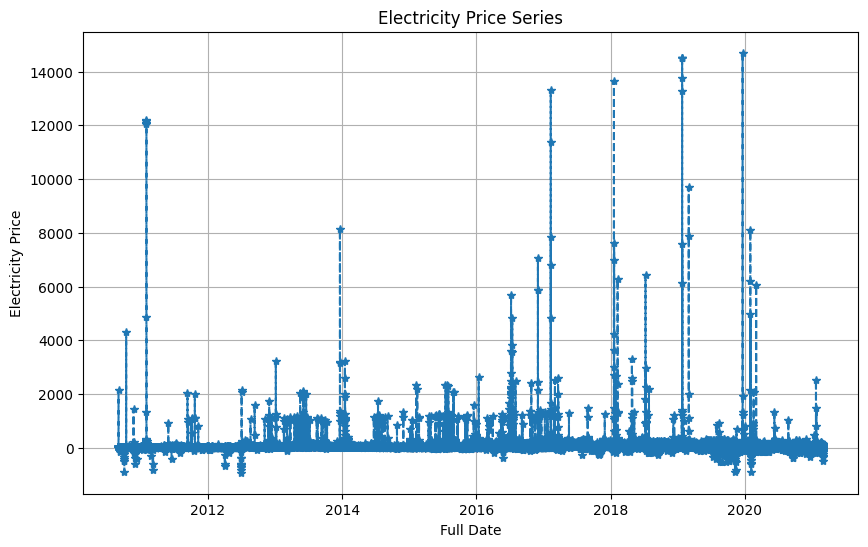

In [244]:
import matplotlib.pyplot as plt 
plt.figure(figsize=(10, 6))
plt.plot(df_copy.index,df_copy.ElecPrice,'--',marker='*',)
plt.grid()
plt.title("Electricity Price Series")
plt.xlabel('Full Date')
plt.ylabel('Electricity Price')
plt.show()


resampling

In [245]:
df_daily = df_copy.resample('D').mean()
     

In [246]:
df_copy.head()

ElecPrice
FullDate                      
2010-09-01 00:00:00     23.710
2010-09-01 01:00:00     22.635
2010-09-01 02:00:00     22.565
2010-09-01 03:00:00     18.910
2010-09-01 04:00:00     18.030

In [247]:
df_daily.head()

ElecPrice
FullDate              
2010-09-01  114.654167
2010-09-02   23.783750
2010-09-03   21.040625
2010-09-04   20.928125
2010-09-05   20.856458

In [248]:
len(df_daily)

3834

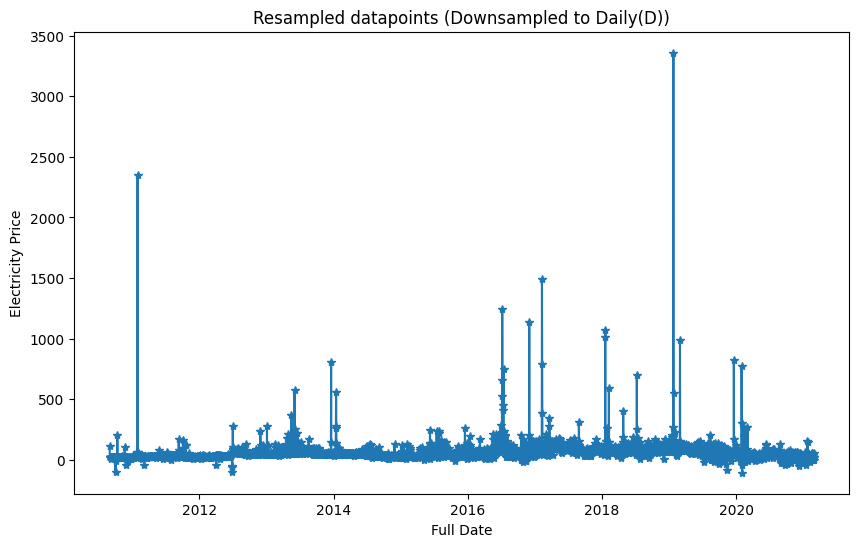

In [249]:
plt.figure(figsize = (10, 6))
plt.plot(df_daily.index, df_daily.ElecPrice, '-', marker = '*')
plt.xlabel('Full Date')
plt.ylabel('Electricity Price')
plt.title("Resampled datapoints (Downsampled to Daily(D))")
plt.show()
    

moving average

In [250]:
df_ma = df_daily.copy()
df_ma.head()

ElecPrice
FullDate              
2010-09-01  114.654167
2010-09-02   23.783750
2010-09-03   21.040625
2010-09-04   20.928125
2010-09-05   20.856458

In [251]:
ma = df_ma['ElecPrice'].rolling(12).mean()
ma

FullDate
2010-09-01          NaN
2010-09-02          NaN
2010-09-03          NaN
2010-09-04          NaN
2010-09-05          NaN
                ...    
2021-02-24    26.624462
2021-02-25    27.415295
2021-02-26    32.261319
2021-02-27    32.252205
2021-02-28    27.423941
Freq: D, Name: ElecPrice, Length: 3834, dtype: float64

In [252]:
ma.isnull().sum()

11

visualisation

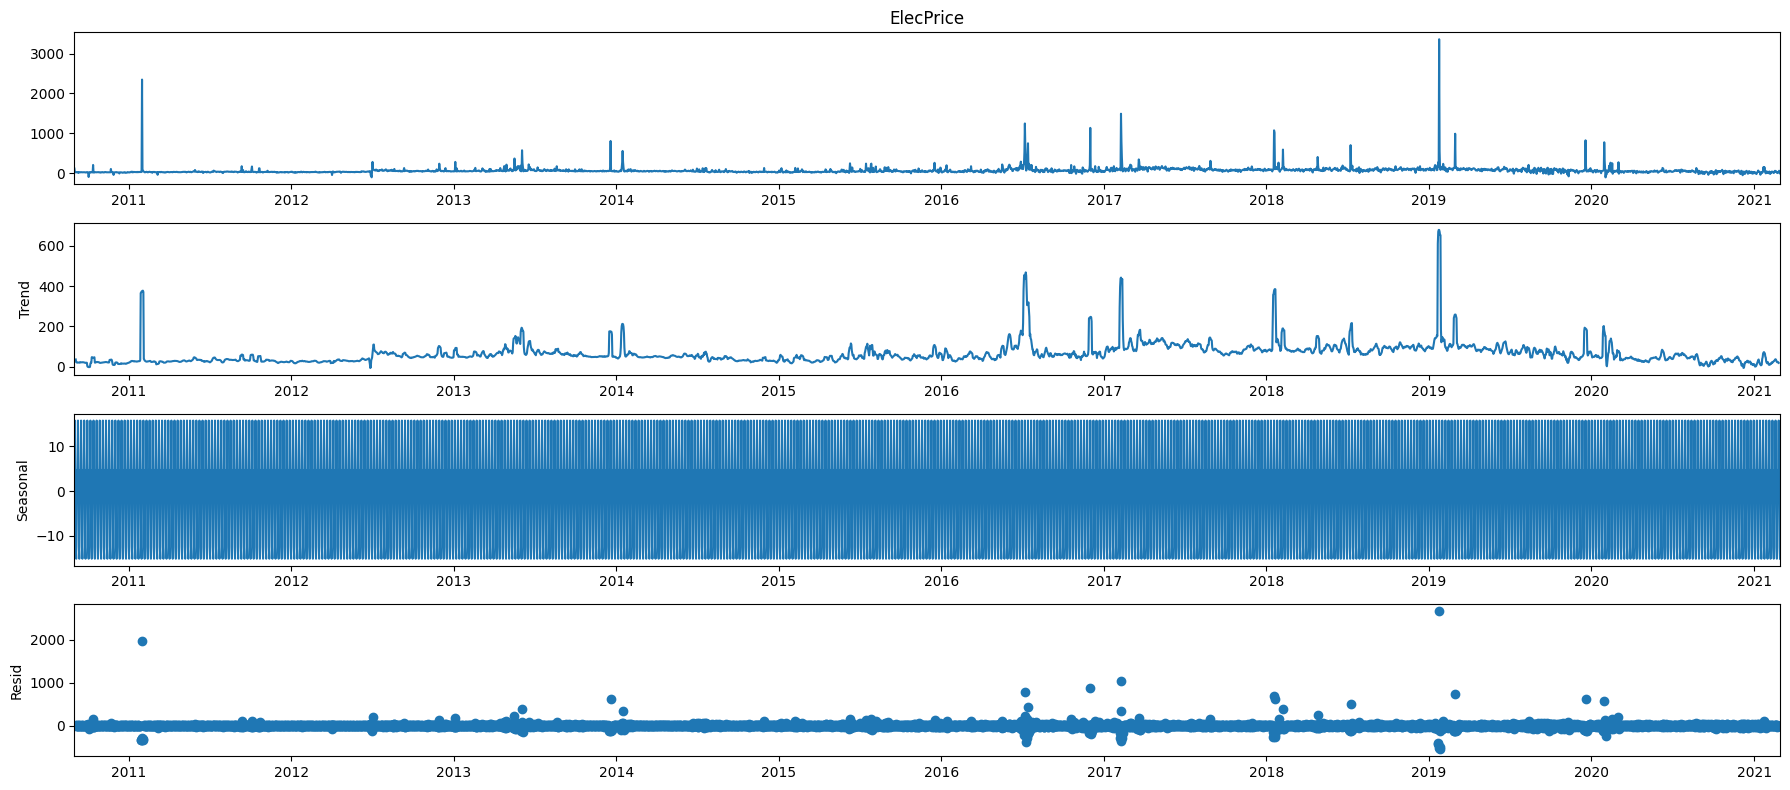

In [253]:
from pylab import rcParams
import statsmodels.api as sm
rcParams['figure.figsize'] = 18, 8

decomposition = sm.tsa.seasonal_decompose(df_daily['ElecPrice'], model = 'additive')
fig = decomposition.plot()
plt.show()

### adfuller: Augmented Dickey-Fuller test used for unit root in univariate process in process of serial correlation


In [254]:
from statsmodels.tsa.stattools import adfuller
adf_res = adfuller(d.ElecPrice)
adf_res


(-31.952975699557843,
 0.0,
 53,
 91962,
 {'1%': -3.430421110703783,
  '5%': -2.8615714297867108,
  '10%': -2.56678672898094},
 1196013.0270263082)

In [255]:
adf_res = adfuller(d.GasPrice)
adf_res

(-6.793388065452672,
 2.3337605343635883e-09,
 48,
 91967,
 {'1%': -3.430421106837576,
  '5%': -2.86157142807793,
  '10%': -2.566786728071412},
 -75401.04101192119)

In [256]:
adf_res[4]

{'1%': -3.430421106837576, '5%': -2.86157142807793, '10%': -2.566786728071412}

In [257]:
print(f'ADF Statistic: {adf_res[0]}')
print(f'p-value: {adf_res[1]}')
print(f'No. of lags used: {adf_res[2]}')
print(f'No. of observations used: {adf_res[3]}')
print('Critical values at each significance level:')
for key, val in adf_res[4].items():
  print(f'  {key}: {val}')
print(f'icbest-maximized information criterion: {adf_res[5]}')
     

ADF Statistic: -6.793388065452672
p-value: 2.3337605343635883e-09
No. of lags used: 48
No. of observations used: 91967
Critical values at each significance level:
  1%: -3.430421106837576
  5%: -2.86157142807793
  10%: -2.566786728071412
icbest-maximized information criterion: -75401.04101192119


In [258]:
adf_res = adfuller(d.SysLoad)
adf_res

(-18.170675426414437,
 2.4474966090685618e-30,
 67,
 91948,
 {'1%': -3.430421121531399,
  '5%': -2.861571434572286,
  '10%': -2.566786731528145},
 1091949.9210293018)

In [259]:
# from the results obtained, the p-value is greater than the critial value at a 5% significance level 
# But ADF Statistic is less than critical value at 5% significance level
# Thus the data is non-stationary

In [260]:
d['SysLoad'].head()

FullDate
2010-09-01 00:00:00    1688.215
2010-09-01 01:00:00    1669.195
2010-09-01 02:00:00    1491.980
2010-09-01 03:00:00    1330.760
2010-09-01 04:00:00    1247.940
Name: SysLoad, dtype: float64

Convert time series into stationary by removing trend and seasonality



In [261]:
# Transformation and Differencing
import numpy as np
df_log = np.log(df_daily)
df_diff = df_log.diff(periods = 1)

/usr/local/lib/python3.9/dist-packages/pandas/core/internals/blocks.py:402: RuntimeWarning:

invalid value encountered in log



In [262]:
df_daily.head()

ElecPrice
FullDate              
2010-09-01  114.654167
2010-09-02   23.783750
2010-09-03   21.040625
2010-09-04   20.928125
2010-09-05   20.856458

In [263]:
df_log.head()

ElecPrice
FullDate             
2010-09-01   4.741920
2010-09-02   3.169003
2010-09-03   3.046455
2010-09-04   3.041094
2010-09-05   3.037664

In [264]:
df_diff.head()

ElecPrice
FullDate             
2010-09-01        NaN
2010-09-02  -1.572918
2010-09-03  -0.122547
2010-09-04  -0.005361
2010-09-05  -0.003430

In [265]:
df_diff.rolling(12)

Rolling [window=12,center=False,axis=0,method=single]

In [266]:
df_diff.rolling(12).mean()

ElecPrice
FullDate             
2010-09-01        NaN
2010-09-02        NaN
2010-09-03        NaN
2010-09-04        NaN
2010-09-05        NaN
...               ...
2021-02-24   0.022468
2021-02-25   0.041792
2021-02-26   0.280616
2021-02-27  -0.000446
2021-02-28        NaN

[3834 rows x 1 columns]

In [267]:
df_diff.rolling(12).mean().isnull().sum()
# 488 rows are null
# df_diff.rolling(12).mean() gives the dataframe that is 'stationary'

ElecPrice    488
dtype: int64

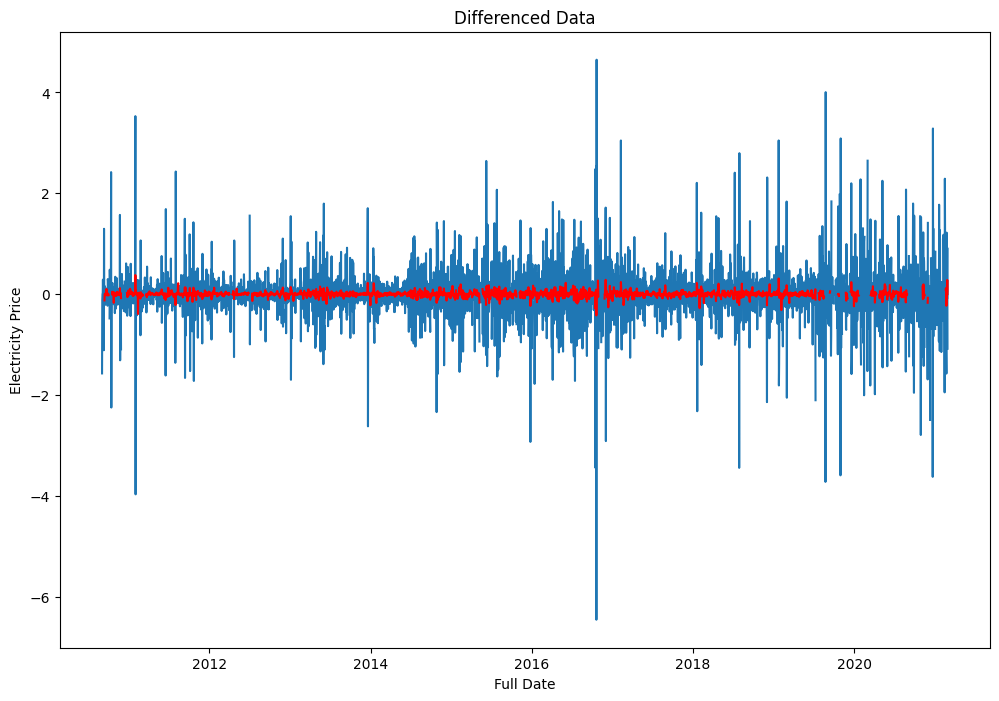

In [268]:
rcParams['figure.figsize'] = 12, 8
plt.plot(df_diff.index, df_diff.ElecPrice, '-')
plt.plot(df_diff.rolling(12).mean(), color = 'red')
plt.title('Differenced Data')
plt.xlabel('Full Date')
plt.ylabel('Electricity Price')
plt.show()

In [269]:
df_diff.dropna(inplace = True)

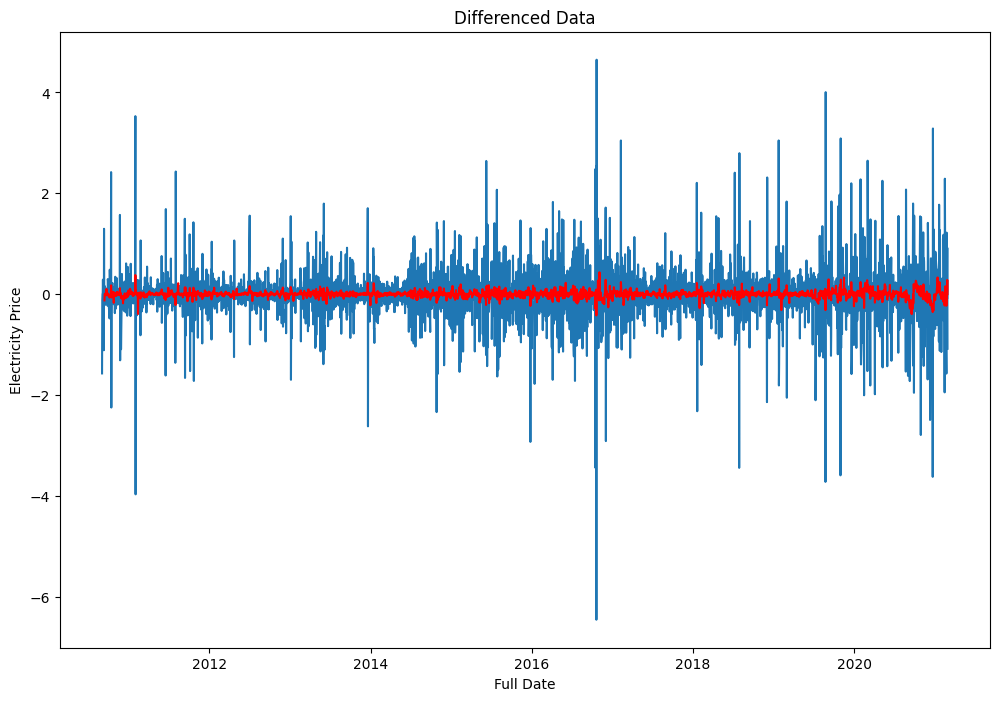

In [270]:
# By removing nulls we eliminated breaks in the plots
rcParams['figure.figsize'] = 12, 8
plt.plot(df_diff.index, df_diff.ElecPrice, '-')
plt.plot(df_diff.rolling(12).mean(), color = 'red')
plt.title('Differenced Data')
plt.xlabel('Full Date')
plt.ylabel('Electricity Price')
plt.show()

In [271]:
#Time Series Forecasting using Stochastic Models

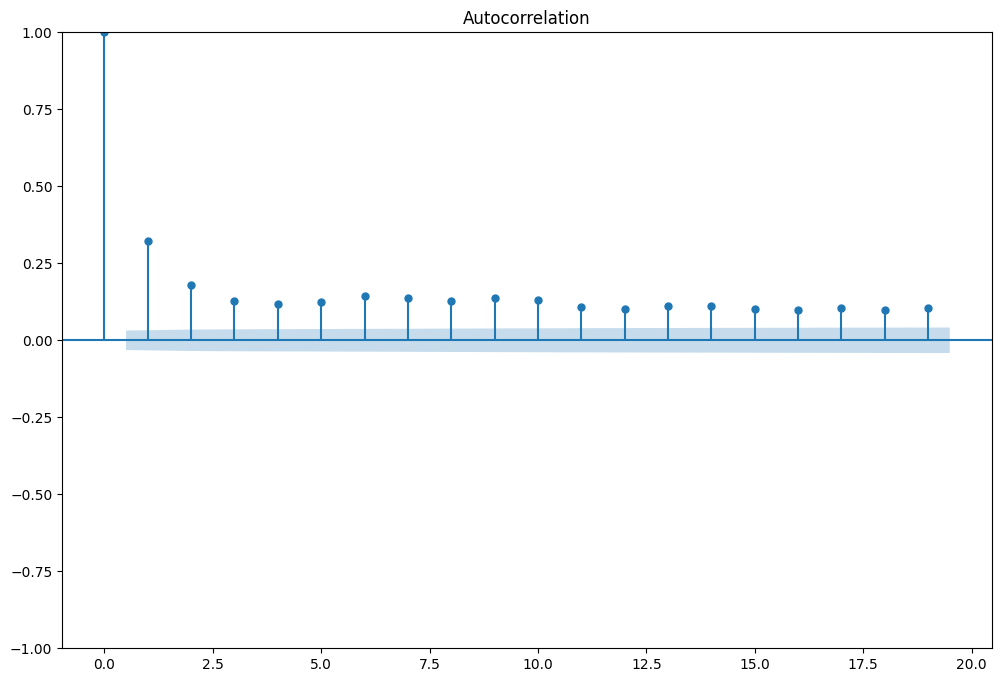

In [272]:
# ACF
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(df_daily, lags = range(0, 20))
plt.show()

/usr/local/lib/python3.9/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning:

The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.



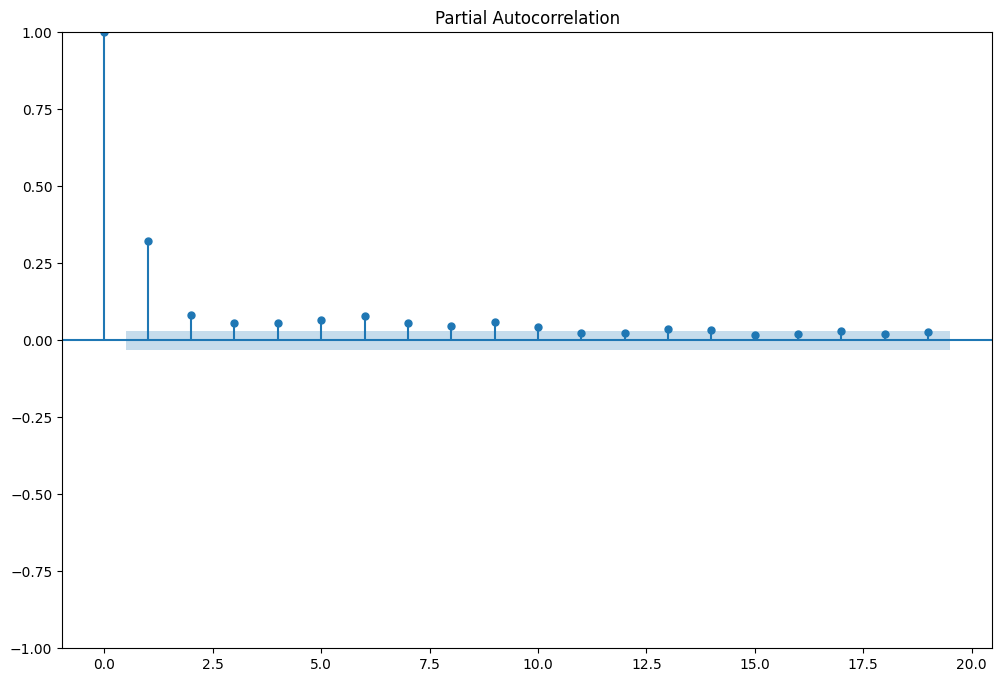

In [273]:
# PACF
plot_pacf(df_daily, lags = range(0, 20))
plt.show()


In [275]:
# The lags where ACF, PACF plots cross this shaded regoin are the values of q, p respectively
# p=q=1
#!pip install pmdarima

In [276]:
from pmdarima import auto_arima
from statsmodels.tsa.arima.model import ARIMA
au_ar = auto_arima(df_daily['ElecPrice'], trace = True, suppress_warning = True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=45245.834, Time=9.14 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=46992.745, Time=0.17 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=46347.966, Time=0.21 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=45424.608, Time=2.06 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=46990.746, Time=0.17 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=45243.870, Time=5.39 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=45260.093, Time=2.60 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=45243.535, Time=2.69 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=45243.842, Time=4.62 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=46069.521, Time=0.28 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=45241.535, Time=0.61 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=45422.608, Time=0.28 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=46345.967, Time=0.09 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=45241.842, Time=0.93 sec
 ARIMA(1,1,2)(0,0,0

In [277]:
train_data = df_daily.iloc[:2757]
test_data = df_daily.iloc[2757:]

In [278]:
len(test_data)

1077

In [279]:
# from statsmodels.tsa.arima.model import ARIMA
# p, d, q

# creating optimal AR model
AR_model = ARIMA(train_data['ElecPrice'], order = (1, 1, 1))

In [280]:
AR_model_res = AR_model.fit()

In [281]:
AR_model_res.fittedvalues

FullDate
2010-09-01      0.000000
2010-09-02    114.310392
2010-09-03     55.786111
2010-09-04     45.883926
2010-09-05     40.655862
                 ...    
2018-03-15    103.590441
2018-03-16    107.002368
2018-03-17    101.300274
2018-03-18     93.629482
2018-03-19     84.536756
Freq: D, Length: 2757, dtype: float64

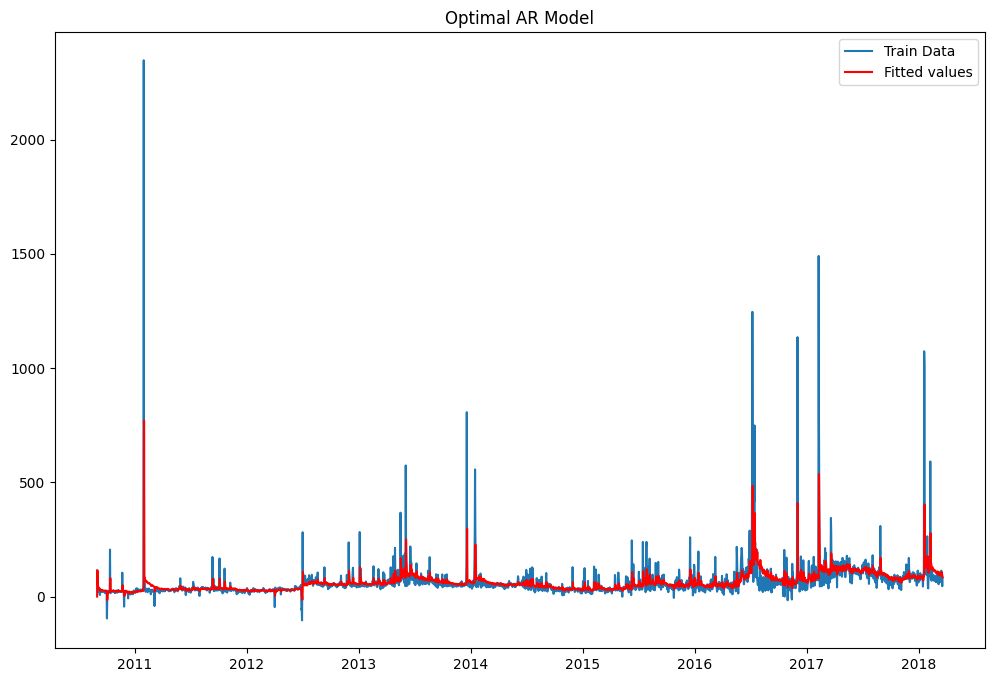

In [282]:
plt.plot(train_data, label = 'Train Data')
plt.plot(AR_model_res.fittedvalues, color='red', label = 'Fitted values')
plt.title("Optimal AR Model")
plt.legend(loc='best')
plt.show()

prediction on test data

In [283]:
start = len(train_data)
end = len(train_data)+len(test_data)-1

In [284]:
pred_data = AR_model_res.predict(start = start, end = end, exog = None, dynamic = False).rename('ARIMA Model Predictions')
pred_data

2018-03-20     95.547212
2018-03-21     99.125637
2018-03-22    100.168017
2018-03-23    100.471658
2018-03-24    100.560108
                 ...    
2021-02-24    100.596463
2021-02-25    100.596463
2021-02-26    100.596463
2021-02-27    100.596463
2021-02-28    100.596463
Freq: D, Name: ARIMA Model Predictions, Length: 1077, dtype: float64

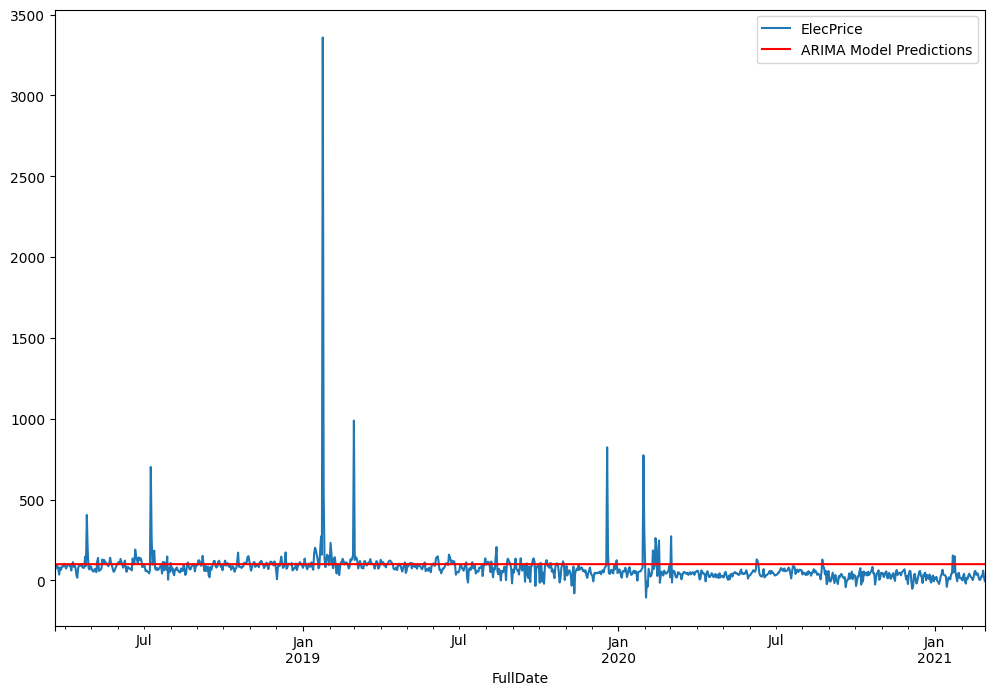

In [285]:
test_data['ElecPrice'].plot(legend = True)
pred_data.plot(legend = True, color = 'red')
plt.show()

In [286]:
# RMSE, MAPE to determine accuracy
test_data['ElecPrice'].mean()

74.72088691581553

In [287]:
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
from math import sqrt
rmse = sqrt(mean_squared_error(pred_data, test_data['ElecPrice']))
rmse

122.60631431475136

In [288]:
# function to return the MAPE values
def fun(actual, predicted)->float:
  # Actual, Predicted has to be converted to numpy array datatype if not already
  if not all([isinstance(actual, np.ndarray), isinstance(predicted, np.ndarray)]):
    actual, predicted = np.array(actual), np.array(predicted)

  # Calculate and return MAPE value
  return round(np.mean(np.abs((actual-predicted)/actual))*100, 2)

In [289]:
test_data

ElecPrice
FullDate             
2018-03-20  76.375000
2018-03-21  72.103750
2018-03-22  94.189583
2018-03-23  89.115000
2018-03-24  71.737500
...               ...
2021-02-24  26.448750
2021-02-25  24.063125
2021-02-26  60.228958
2021-02-27  20.374167
2021-02-28  -4.124375

[1077 rows x 1 columns]

In [290]:
fun(test_data['y'], pred_data)

391.19

In [291]:
# !pip install pystan~=2.14
# !pip install fbprophet

In [292]:
# Forecast time series
from fbprophet import Prophet
from prophet.plot import plot_plotly, plot_components_plotly

In [293]:
d = pd.read_csv("https://github.com/HamoyeHQ/HDSC-Time-series-analysis-and-forecast/files/7768846/Time_series_analysis_and_forecast_DATASET.csv")

In [294]:
d.head()

FullDate  Tmax   SysLoad  GasPrice  ElecPrice
0  2010-09-01 00:00:00  15.8  1688.215      3.69     23.710
1  2010-09-01 01:00:00  15.8  1669.195      3.69     22.635
2  2010-09-01 02:00:00  15.8  1491.980      3.69     22.565
3  2010-09-01 03:00:00  15.8  1330.760      3.69     18.910
4  2010-09-01 04:00:00  15.8  1247.940      3.69     18.030

In [295]:
df_curr = d[['FullDate', 'ElecPrice']]
     

In [296]:
# Renaming to datestamp(ds) and target(y)
df_curr = df_curr.rename(columns = {'FullDate': 'ds', 'ElecPrice': 'y'})

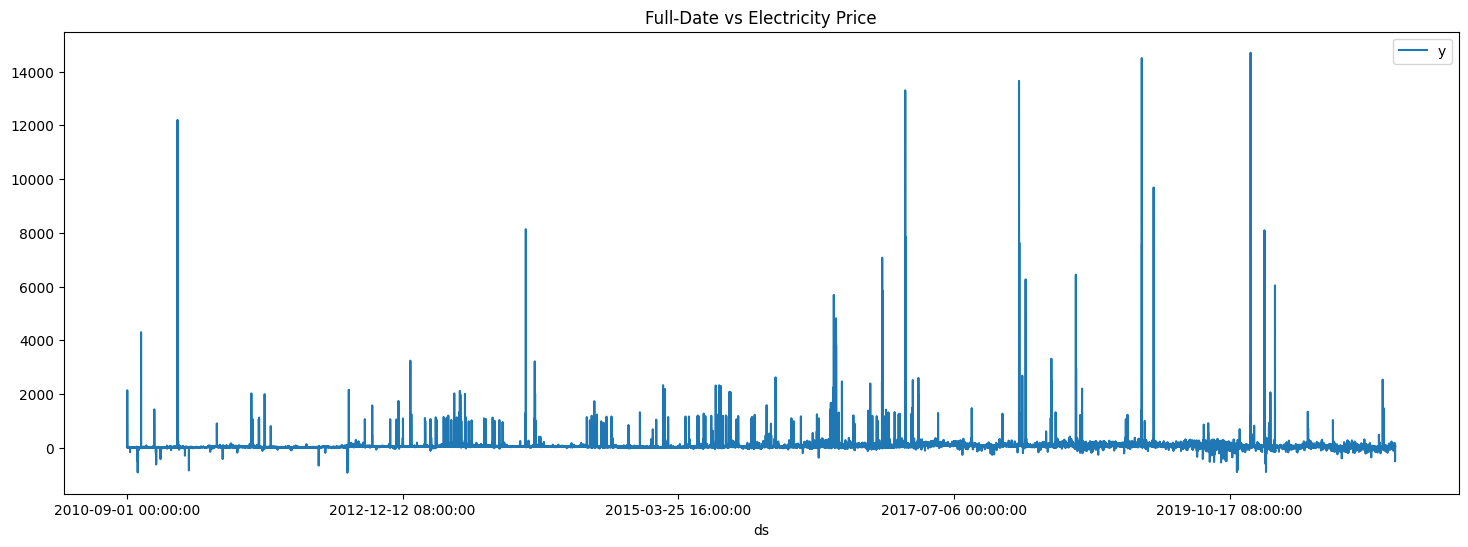

In [297]:
df_curr.plot(x = 'ds', y = 'y', figsize = (18, 6))
plt.title("Full-Date vs Electricity Price")
plt.show()

In [298]:
df_curr.shape

(92016, 2)

In [299]:
df_curr.head()

ds       y
0  2010-09-01 00:00:00  23.710
1  2010-09-01 01:00:00  22.635
2  2010-09-01 02:00:00  22.565
3  2010-09-01 03:00:00  18.910
4  2010-09-01 04:00:00  18.030

In [300]:
df_curr.set_index( "ds" , inplace= True ) 
df_curr.head()

y
ds                         
2010-09-01 00:00:00  23.710
2010-09-01 01:00:00  22.635
2010-09-01 02:00:00  22.565
2010-09-01 03:00:00  18.910
2010-09-01 04:00:00  18.030

In [301]:
# Resampling (Downsampling) to Daily(D)
#df_curr = df_curr.resample('D').mean()

In [302]:
# Reset the index after downsampling to Daily basis
df_curr.reset_index(inplace = True)

In [303]:
train_data = df_curr.iloc[:2757]
test_data = df_curr.iloc[2757:]

In [304]:
model = Prophet()

In [305]:
model.fit(train_data)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/usr/local/lib/python3.9/dist-packages/fbprophet/forecaster.py:891: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



In [306]:
future = model.make_future_dataframe(periods = 1077)

In [313]:
future

ds
0    2010-09-01 00:00:00
1    2010-09-01 01:00:00
2    2010-09-01 02:00:00
3    2010-09-01 03:00:00
4    2010-09-01 04:00:00
...                  ...
3829 2013-12-01 20:00:00
3830 2013-12-02 20:00:00
3831 2013-12-03 20:00:00
3832 2013-12-04 20:00:00
3833 2013-12-05 20:00:00

[3834 rows x 1 columns]

In [314]:
forecast = model.predict(future)
forecast

/usr/local/lib/python3.9/dist-packages/fbprophet/forecaster.py:891: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/usr/local/lib/python3.9/dist-packages/fbprophet/forecaster.py:891: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



ds       trend   yhat_lower   yhat_upper  trend_lower  \
0    2010-09-01 00:00:00   37.547173   -84.790859   179.194786    37.547173   
1    2010-09-01 01:00:00   37.497537   -88.676540   160.850583    37.497537   
2    2010-09-01 02:00:00   37.447902   -85.290948   161.670038    37.447902   
3    2010-09-01 03:00:00   37.398267   -89.017784   165.596135    37.398267   
4    2010-09-01 04:00:00   37.348631   -84.525949   159.121658    37.348631   
...                  ...         ...          ...          ...          ...   
3829 2013-12-01 20:00:00 -267.471648 -3704.440338  3155.343352 -3664.926462   
3830 2013-12-02 20:00:00 -267.733603 -3660.565998  3157.544372 -3668.940797   
3831 2013-12-03 20:00:00 -267.995558 -3677.555341  3207.340438 -3672.955759   
3832 2013-12-04 20:00:00 -268.257513 -3714.903701  3201.717159 -3676.984231   
3833 2013-12-05 20:00:00 -268.519467 -3703.916524  3208.247833 -3681.448753   

      trend_upper  additive_terms  additive_terms_lower  additive_terms_upper  \
0       37.547173        7.708318              7.708318              7.708318   
1       37.497537        6.710280              6.710280              6.710280   
2       37.447902        3.172329              3.172329              3.172329   
3       37.398267       -0.807416             -0.807416             -0.807416   
4       37.348631       -3.292182             -3.292182             -3.292182   
...           ...             ...                   ...                   ...   
3829  3161.893179       -4.021239             -4.021239             -4.021239   
3830  3165.868107        5.509109              5.509109              5.509109   
3831  3169.843062        5.675213              5.675213              5.675213   
3832  3173.781957       16.546857             16.546857             16.546857   
3833  3179.164147       -4.179017             -4.179017             -4.179017   

          daily  daily_lower  daily_upper     weekly  weekly_lower  \
0      0.309255     0.309255     0.309255   7.399063      7.399063   
1     -1.574145    -1.574145    -1.574145   8.284425      8.284425   
2     -5.996992    -5.996992    -5.996992   9.169321      9.169321   
3    -10.850790   -10.850790   -10.850790  10.043374     10.043374   
4    -14.188358   -14.188358   -14.188358  10.896176     10.896176   
...         ...          ...          ...        ...           ...   
3829   1.622964     1.622964     1.622964  -5.644203     -5.644203   
3830   1.622964     1.622964     1.622964   3.886145      3.886145   
3831   1.622964     1.622964     1.622964   4.052249      4.052249   
3832   1.622964     1.622964     1.622964  14.923893     14.923893   
3833   1.622964     1.622964     1.622964  -5.801981     -5.801981   

      weekly_upper  multiplicative_terms  multiplicative_terms_lower  \
0         7.399063                   0.0                         0.0   
1         8.284425                   0.0                         0.0   
2         9.169321                   0.0                         0.0   
3        10.043374                   0.0                         0.0   
4        10.896176                   0.0                         0.0   
...            ...                   ...                         ...   
3829     -5.644203                   0.0                         0.0   
3830      3.886145                   0.0                         0.0   
3831      4.052249                   0.0                         0.0   
3832     14.923893                   0.0                         0.0   
3833     -5.801981                   0.0                         0.0   

      multiplicative_terms_upper        yhat  
0                            0.0   45.255491  
1                            0.0   44.207817  
2                            0.0   40.620231  
3                            0.0   36.590850  
4                            0.0   34.056449  
...                          ...         ...  
3829                         0.0 -271.492887  
3830              

In [315]:
forecast.columns

Index(['ds', 'trend', 'yhat_lower', 'yhat_upper', 'trend_lower', 'trend_upper',
       'additive_terms', 'additive_terms_lower', 'additive_terms_upper',
       'daily', 'daily_lower', 'daily_upper', 'weekly', 'weekly_lower',
       'weekly_upper', 'multiplicative_terms', 'multiplicative_terms_lower',
       'multiplicative_terms_upper', 'yhat'],
      dtype='object')

In [316]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

ds        yhat   yhat_lower   yhat_upper
3829 2013-12-01 20:00:00 -271.492887 -3704.440338  3155.343352
3830 2013-12-02 20:00:00 -262.224494 -3660.565998  3157.544372
3831 2013-12-03 20:00:00 -262.320345 -3677.555341  3207.340438
3832 2013-12-04 20:00:00 -251.710656 -3714.903701  3201.717159
3833 2013-12-05 20:00:00 -272.698484 -3703.916524  3208.247833

In [317]:
test_data.tail()

ds        y
92011  2021-02-28 19:00:00  117.925
92012  2021-02-28 20:00:00   87.880
92013  2021-02-28 21:00:00   62.060
92014  2021-02-28 22:00:00   62.000
92015  2021-02-28 23:00:00   62.955

In [318]:

plot_plotly(model, forecast)

In [319]:
plot_components_plotly(model, forecast)

/usr/local/lib/python3.9/dist-packages/fbprophet/forecaster.py:891: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/usr/local/lib/python3.9/dist-packages/fbprophet/forecaster.py:891: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



In [320]:
fore = forecast.iloc[2757:]

In [321]:
fore.shape

(1077, 19)

In [322]:
test_data.shape

(89259, 2)

In [323]:
test_data['y'].mean()

67.14762147234453

In [324]:
rmse = sqrt(mean_squared_error(fore['yhat'], test_data['y']))
rmse

133.91976300010188

In [325]:
mape = calculate_MAPE(test_data['y'], fore['yhat'])
mape

547.91

Multivariate Analysis

In [326]:
d.head()

FullDate  Tmax   SysLoad  GasPrice  ElecPrice
0  2010-09-01 00:00:00  15.8  1688.215      3.69     23.710
1  2010-09-01 01:00:00  15.8  1669.195      3.69     22.635
2  2010-09-01 02:00:00  15.8  1491.980      3.69     22.565
3  2010-09-01 03:00:00  15.8  1330.760      3.69     18.910
4  2010-09-01 04:00:00  15.8  1247.940      3.69     18.030

In [327]:
d['FullDate'] = pd.to_datetime(d.FullDate)

In [328]:
d = d.set_index("FullDate")

In [329]:
d.head()

Tmax   SysLoad  GasPrice  ElecPrice
FullDate                                                
2010-09-01 00:00:00  15.8  1688.215      3.69     23.710
2010-09-01 01:00:00  15.8  1669.195      3.69     22.635
2010-09-01 02:00:00  15.8  1491.980      3.69     22.565
2010-09-01 03:00:00  15.8  1330.760      3.69     18.910
2010-09-01 04:00:00  15.8  1247.940      3.69     18.030

In [330]:
d = d.resample('D').mean()

In [331]:
# Reset the index after downsampling to Daily basis
d.reset_index(inplace = True)

In [332]:
d.rename(columns = {'FullDate': 'ds', 'ElecPrice': 'y'}, inplace = True)

In [333]:
# Train Test Split
train_data = d.iloc[:2757]
test_data = d.iloc[2757:]

In [334]:
# adding other 3 columns as regressors to the model
multi_model = Prophet()
multi_model.add_regressor('Tmax')
multi_model.add_regressor('SysLoad')
multi_model.add_regressor('GasPrice')

In [335]:

multi_model.fit(train_data)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/usr/local/lib/python3.9/dist-packages/fbprophet/forecaster.py:891: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



In [336]:
future = model.make_future_dataframe(periods = 1077)

In [337]:
future

ds
0    2010-09-01 00:00:00
1    2010-09-01 01:00:00
2    2010-09-01 02:00:00
3    2010-09-01 03:00:00
4    2010-09-01 04:00:00
...                  ...
3829 2013-12-01 20:00:00
3830 2013-12-02 20:00:00
3831 2013-12-03 20:00:00
3832 2013-12-04 20:00:00
3833 2013-12-05 20:00:00

[3834 rows x 1 columns]

In [338]:

forecast = model.predict(future)
forecast

/usr/local/lib/python3.9/dist-packages/fbprophet/forecaster.py:891: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/usr/local/lib/python3.9/dist-packages/fbprophet/forecaster.py:891: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



ds       trend   yhat_lower   yhat_upper  trend_lower  \
0    2010-09-01 00:00:00   37.547173   -83.896348   186.883554    37.547173   
1    2010-09-01 01:00:00   37.497537   -80.545548   165.286013    37.497537   
2    2010-09-01 02:00:00   37.447902   -87.544212   171.843530    37.447902   
3    2010-09-01 03:00:00   37.398267   -87.028058   162.391442    37.398267   
4    2010-09-01 04:00:00   37.348631  -103.600738   164.858972    37.348631   
...                  ...         ...          ...          ...          ...   
3829 2013-12-01 20:00:00 -267.471648 -3657.951489  3606.378106 -3603.399287   
3830 2013-12-02 20:00:00 -267.733603 -3541.389842  3580.219084 -3606.219108   
3831 2013-12-03 20:00:00 -267.995558 -3544.016361  3611.725015 -3608.834116   
3832 2013-12-04 20:00:00 -268.257513 -3610.049158  3612.079415 -3611.565879   
3833 2013-12-05 20:00:00 -268.519467 -3638.242448  3605.697111 -3614.387419   

      trend_upper  additive_terms  additive_terms_lower  additive_terms_upper  \
0       37.547173        7.708318              7.708318              7.708318   
1       37.497537        6.710280              6.710280              6.710280   
2       37.447902        3.172329              3.172329              3.172329   
3       37.398267       -0.807416             -0.807416             -0.807416   
4       37.348631       -3.292182             -3.292182             -3.292182   
...           ...             ...                   ...                   ...   
3829  3569.449748       -4.021239             -4.021239             -4.021239   
3830  3574.972911        5.509109              5.509109              5.509109   
3831  3579.773923        5.675213              5.675213              5.675213   
3832  3584.349241       16.546857             16.546857             16.546857   
3833  3588.924559       -4.179017             -4.179017             -4.179017   

          daily  daily_lower  daily_upper     weekly  weekly_lower  \
0      0.309255     0.309255     0.309255   7.399063      7.399063   
1     -1.574145    -1.574145    -1.574145   8.284425      8.284425   
2     -5.996992    -5.996992    -5.996992   9.169321      9.169321   
3    -10.850790   -10.850790   -10.850790  10.043374     10.043374   
4    -14.188358   -14.188358   -14.188358  10.896176     10.896176   
...         ...          ...          ...        ...           ...   
3829   1.622964     1.622964     1.622964  -5.644203     -5.644203   
3830   1.622964     1.622964     1.622964   3.886145      3.886145   
3831   1.622964     1.622964     1.622964   4.052249      4.052249   
3832   1.622964     1.622964     1.622964  14.923893     14.923893   
3833   1.622964     1.622964     1.622964  -5.801981     -5.801981   

      weekly_upper  multiplicative_terms  multiplicative_terms_lower  \
0         7.399063                   0.0                         0.0   
1         8.284425                   0.0                         0.0   
2         9.169321                   0.0                         0.0   
3        10.043374                   0.0                         0.0   
4        10.896176                   0.0                         0.0   
...            ...                   ...                         ...   
3829     -5.644203                   0.0                         0.0   
3830      3.886145                   0.0                         0.0   
3831      4.052249                   0.0                         0.0   
3832     14.923893                   0.0                         0.0   
3833     -5.801981                   0.0                         0.0   

      multiplicative_terms_upper        yhat  
0                            0.0   45.255491  
1                            0.0   44.207817  
2                            0.0   40.620231  
3                            0.0   36.590850  
4                            0.0   34.056449  
...                          ...         ...  
3829                         0.0 -271.492887  
3830              

In [339]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

ds        yhat   yhat_lower   yhat_upper
3829 2013-12-01 20:00:00 -271.492887 -3657.951489  3606.378106
3830 2013-12-02 20:00:00 -262.224494 -3541.389842  3580.219084
3831 2013-12-03 20:00:00 -262.320345 -3544.016361  3611.725015
3832 2013-12-04 20:00:00 -251.710656 -3610.049158  3612.079415
3833 2013-12-05 20:00:00 -272.698484 -3638.242448  3605.697111

In [340]:
test_data.tail()

ds  Tmax     SysLoad  GasPrice          y
3829 2021-02-24  22.4  -63.562394    5.6000  26.448750
3830 2021-02-25  21.6  189.128273    5.4377  24.063125
3831 2021-02-26  22.8  396.542679    5.4242  60.228958
3832 2021-02-27  23.5  205.536673    5.4200  20.374167
3833 2021-02-28  24.3  278.127285    5.4848  -4.124375

In [341]:
plot_plotly(multi_model, forecast)

In [342]:
plot_components_plotly(multi_model, forecast)

/usr/local/lib/python3.9/dist-packages/fbprophet/forecaster.py:891: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/usr/local/lib/python3.9/dist-packages/fbprophet/forecaster.py:891: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



In [343]:
test_data['y'].mean()

74.72088691581553

In [344]:
fore = forecast[2757:]

In [345]:
rmse = sqrt(mean_squared_error(fore['yhat'], test_data['y']))

In [346]:
mape = fun(test_data['y'], fore['yhat'])
mape

989.28

working with regressor

In [347]:
d = pd.read_csv("https://github.com/HamoyeHQ/HDSC-Time-series-analysis-and-forecast/files/7768846/Time_series_analysis_and_forecast_DATASET.csv")

In [348]:
d

FullDate  Tmax     SysLoad  GasPrice  ElecPrice
0      2010-09-01 00:00:00  15.8  1688.21500    3.6900     23.710
1      2010-09-01 01:00:00  15.8  1669.19500    3.6900     22.635
2      2010-09-01 02:00:00  15.8  1491.98000    3.6900     22.565
3      2010-09-01 03:00:00  15.8  1330.76000    3.6900     18.910
4      2010-09-01 04:00:00  15.8  1247.94000    3.6900     18.030
...                    ...   ...         ...       ...        ...
92011  2021-02-28 19:00:00  24.3   449.63625    5.4848    117.925
92012  2021-02-28 20:00:00  24.3   815.59975    5.4848     87.880
92013  2021-02-28 21:00:00  24.3   745.12325    5.4848     62.060
92014  2021-02-28 22:00:00  24.3   694.95150    5.4848     62.000
92015  2021-02-28 23:00:00  24.3   714.69630    5.4848     62.955

[92016 rows x 5 columns]

In [349]:
d = d.set_index("FullDate") 
d.head()

Tmax   SysLoad  GasPrice  ElecPrice
FullDate                                                
2010-09-01 00:00:00  15.8  1688.215      3.69     23.710
2010-09-01 01:00:00  15.8  1669.195      3.69     22.635
2010-09-01 02:00:00  15.8  1491.980      3.69     22.565
2010-09-01 03:00:00  15.8  1330.760      3.69     18.910
2010-09-01 04:00:00  15.8  1247.940      3.69     18.030

In [350]:
d.reset_index(inplace = True)
d.head()

FullDate  Tmax   SysLoad  GasPrice  ElecPrice
0  2010-09-01 00:00:00  15.8  1688.215      3.69     23.710
1  2010-09-01 01:00:00  15.8  1669.195      3.69     22.635
2  2010-09-01 02:00:00  15.8  1491.980      3.69     22.565
3  2010-09-01 03:00:00  15.8  1330.760      3.69     18.910
4  2010-09-01 04:00:00  15.8  1247.940      3.69     18.030

In [351]:
d.rename(columns = {'FullDate':'ds', 'ElecPrice':'y'}, inplace= True)
d.head()

ds  Tmax   SysLoad  GasPrice       y
0  2010-09-01 00:00:00  15.8  1688.215      3.69  23.710
1  2010-09-01 01:00:00  15.8  1669.195      3.69  22.635
2  2010-09-01 02:00:00  15.8  1491.980      3.69  22.565
3  2010-09-01 03:00:00  15.8  1330.760      3.69  18.910
4  2010-09-01 04:00:00  15.8  1247.940      3.69  18.030

In [352]:
train_data = d.iloc[:2757]
test_data = d.iloc[2757:]
print(train_data.shape, test_data.shape)

(2757, 5) (89259, 5)


In [353]:
multi1_model = Prophet()
multi1_model.add_regressor('SysLoad')
multi1_model.add_regressor('GasPrice')
multi1_model.fit(train_data)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/usr/local/lib/python3.9/dist-packages/fbprophet/forecaster.py:891: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



In [354]:
train_data.drop(columns=['Tmax'], inplace = True)

<ipython-input-354-cf2088a31bc5>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [355]:
future = multi1_model.make_future_dataframe(periods=1077)
forecast = multi1_model.predict(future)

ValueError: ignored

In [356]:
fore = forecast.iloc[2757:]

In [357]:
plot_plotly(multi1_model, forecast)

In [358]:
plot_components_plotly(multi1_model, forecast)
     


/usr/local/lib/python3.9/dist-packages/fbprophet/forecaster.py:891: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/usr/local/lib/python3.9/dist-packages/fbprophet/forecaster.py:891: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



In [359]:
rmse=sqrt(mean_squared_error(fore['yhat'], test_data['y']))
print(rmse)

133.91976300010188